In [1]:
# Note: Job samples overlap in this notebook, so refer to timesteps=10 notebook, 
# that one separates JobsID 

In [167]:
# This notebook contains:
#
# Functions to connect to MYSQL database and generate list of feature vectors for each JOBID

In [168]:
# Connect to MYSQL database

hostname = 'localhost'
username = 'a1singh'
password = 'sdsc1234'
database = 'belle2'

import pandas as pd
import numpy as np

In [169]:
import sys
print(sys.executable)
print(sys.version)

/data/home/a1singh/anaconda3/envs/keras/bin/python
3.5.4 |Anaconda, Inc.| (default, Nov 20 2017, 18:44:38) 
[GCC 7.2.0]


In [546]:
import pymysql
from IPython.display import display, HTML

conn = pymysql.connect(host=hostname, user=username, passwd=password, db=database)
print(conn)



In [548]:
query = "SELECT COUNT(DISTINCT JobGroup) AS Count_JobGroups FROM Jobs"
df_groups = pd.read_sql(query, conn)
df_groups 

# Decision: to include JobGroups into the feature vector

,Count_JobGroups
0,5405


In [549]:
%%time
# Total number of unique JobIDs in Jobs
# number of distinct JobIDs (ans - 10,485,197)

df_job_count = pd.read_sql("SELECT COUNT(DISTINCT JobID) FROM Jobs", conn)
display(df_job_count)

,COUNT(DISTINCT JobID)
0,10485197


CPU times: user 9.46 ms, sys: 4.89 ms, total: 14.3 ms
Wall time: 10.6 s


In [550]:
5405/10485197

0.0005154886455638364

In [171]:
query = "show tables"
df = pd.read_sql(query, conn)
tables = df['Tables_in_belle2'].tolist()

In [172]:
for tname in tables:
    print(tname)
    df = pd.read_sql("SHOW COLUMNS FROM "+tname, conn)
    display(df)
    x = df.as_matrix()
    print(x)
    print(len(x))
    print(100*'-')

AtticJobParameters


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,Name,varchar(100),NO,PRI,None,
2,Value,blob,NO,,None,
3,RescheduleCycle,int(11) unsigned,NO,PRI,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['Name' 'varchar(100)' 'NO' 'PRI' None '']
 ['Value' 'blob' 'NO' '' None '']
 ['RescheduleCycle' 'int(11) unsigned' 'NO' 'PRI' None '']]
4
----------------------------------------------------------------------------------------------------
HeartBeatLoggingInfo


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,Name,varchar(100),NO,PRI,None,
2,Value,blob,NO,,None,
3,HeartBeatTime,datetime,NO,PRI,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['Name' 'varchar(100)' 'NO' 'PRI' None '']
 ['Value' 'blob' 'NO' '' None '']
 ['HeartBeatTime' 'datetime' 'NO' 'PRI' None '']]
4
----------------------------------------------------------------------------------------------------
InputData


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,LFN,varchar(255),NO,PRI,,
2,Status,varchar(32),NO,,AprioriGood,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['LFN' 'varchar(255)' 'NO' 'PRI' '' '']
 ['Status' 'varchar(32)' 'NO' '' 'AprioriGood' '']]
3
----------------------------------------------------------------------------------------------------
JobCommands


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,Command,varchar(100),NO,,None,
2,Arguments,varchar(100),NO,PRI,None,
3,Status,varchar(64),NO,,Received,
4,ReceptionTime,datetime,NO,PRI,None,
5,ExecutionTime,datetime,YES,,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['Command' 'varchar(100)' 'NO' '' None '']
 ['Arguments' 'varchar(100)' 'NO' 'PRI' None '']
 ['Status' 'varchar(64)' 'NO' '' 'Received' '']
 ['ReceptionTime' 'datetime' 'NO' 'PRI' None '']
 ['ExecutionTime' 'datetime' 'YES' '' None '']]
6
----------------------------------------------------------------------------------------------------
JobJDLs


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,auto_increment
1,JDL,mediumblob,NO,,None,
2,JobRequirements,blob,NO,,None,
3,OriginalJDL,mediumblob,NO,,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None 'auto_increment']
 ['JDL' 'mediumblob' 'NO' '' None '']
 ['JobRequirements' 'blob' 'NO' '' None '']
 ['OriginalJDL' 'mediumblob' 'NO' '' None '']]
4
----------------------------------------------------------------------------------------------------
JobParameters


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,Name,varchar(100),NO,PRI,None,
2,Value,blob,NO,,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['Name' 'varchar(100)' 'NO' 'PRI' None '']
 ['Value' 'blob' 'NO' '' None '']]
3
----------------------------------------------------------------------------------------------------
Jobs


,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,0,
1,JobType,varchar(32),NO,MUL,user,
2,DIRACSetup,varchar(32),NO,MUL,test,
3,JobGroup,varchar(32),NO,MUL,00000000,
4,JobSplitType,"enum('Single','Master','Subjob','DAGNode')",NO,MUL,Single,
5,MasterJobID,int(11) unsigned,NO,,0,
6,Site,varchar(100),NO,MUL,ANY,
7,JobName,varchar(128),NO,,Unknown,
8,Owner,varchar(32),NO,MUL,Unknown,
9,OwnerDN,varchar(255),NO,MUL,Unknown,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' '0' '']
 ['JobType' 'varchar(32)' 'NO' 'MUL' 'user' '']
 ['DIRACSetup' 'varchar(32)' 'NO' 'MUL' 'test' '']
 ['JobGroup' 'varchar(32)' 'NO' 'MUL' '00000000' '']
 ['JobSplitType' "enum('Single','Master','Subjob','DAGNode')" 'NO' 'MUL'
  'Single' '']
 ['MasterJobID' 'int(11) unsigned' 'NO' '' '0' '']
 ['Site' 'varchar(100)' 'NO' 'MUL' 'ANY' '']
 ['JobName' 'varchar(128)' 'NO' '' 'Unknown' '']
 ['Owner' 'varchar(32)' 'NO' 'MUL' 'Unknown' '']
 ['OwnerDN' 'varchar(255)' 'NO' 'MUL' 'Unknown' '']
 ['OwnerGroup' 'varchar(128)' 'NO' 'MUL' 'Unknown' '']
 ['SubmissionTime' 'datetime' 'YES' '' None '']
 ['RescheduleTime' 'datetime' 'YES' '' None '']
 ['LastUpdateTime' 'datetime' 'YES' 'MUL' None '']
 ['StartExecTime' 'datetime' 'YES' '' None '']
 ['HeartBeatTime' 'datetime' 'YES' '' None '']
 ['EndExecTime' 'datetime' 'YES' '' None '']
 ['Status' 'varchar(32)' 'NO' 'MUL' 'Received' '']
 ['MinorStatus' 'varchar(128)' 'NO' 'MUL' 'Unknown' '']
 ['ApplicationStat

,Field,Type,Null,Key,Default,Extra
0,JobID,int(11) unsigned,NO,PRI,None,
1,Name,varchar(100),NO,PRI,None,
2,Value,mediumblob,NO,,None,


[['JobID' 'int(11) unsigned' 'NO' 'PRI' None '']
 ['Name' 'varchar(100)' 'NO' 'PRI' None '']
 ['Value' 'mediumblob' 'NO' '' None '']]
3
----------------------------------------------------------------------------------------------------
SiteMask


,Field,Type,Null,Key,Default,Extra
0,Site,varchar(64),NO,PRI,None,
1,Status,varchar(64),NO,,None,
2,LastUpdateTime,datetime,NO,,None,
3,Author,varchar(255),NO,,None,
4,Comment,blob,NO,,None,


[['Site' 'varchar(64)' 'NO' 'PRI' None '']
 ['Status' 'varchar(64)' 'NO' '' None '']
 ['LastUpdateTime' 'datetime' 'NO' '' None '']
 ['Author' 'varchar(255)' 'NO' '' None '']
 ['Comment' 'blob' 'NO' '' None '']]
5
----------------------------------------------------------------------------------------------------
SiteMaskLogging


,Field,Type,Null,Key,Default,Extra
0,Site,varchar(64),NO,PRI,None,
1,Status,varchar(64),NO,,None,
2,UpdateTime,datetime,NO,PRI,None,
3,Author,varchar(255),NO,,None,
4,Comment,blob,NO,,None,


[['Site' 'varchar(64)' 'NO' 'PRI' None '']
 ['Status' 'varchar(64)' 'NO' '' None '']
 ['UpdateTime' 'datetime' 'NO' 'PRI' None '']
 ['Author' 'varchar(255)' 'NO' '' None '']
 ['Comment' 'blob' 'NO' '' None '']]
5
----------------------------------------------------------------------------------------------------


In [ ]:
%%time
#  Total number of rows in HeartBeatLoggingInfo

df = pd.read_sql("  SELECT Total_Rows = SUM(st.row_count) \
                    FROM sys.dm_db_partition_stats st \
                    WHERE object_name(object_id) = 'HeartBeatLoggingInfo' AND (index_id < 2)", conn)

In [ ]:
%%time
# Total number of rows in HeartBeatLoggingInfo (ans - 906,320,307)

df = pd.read_sql("SELECT COUNT(*) FROM HeartBeatLoggingInfo", conn)
display(df)

In [ ]:
%%time
# Total number of unique JobIDs in HeartBeatLoggingInfo
# number of distinct JobIDs (ans - 10,137,037)

df = pd.read_sql("SELECT COUNT(DISTINCT JobID) FROM HeartBeatLoggingInfo LIMIT 10", conn)
display(df)

In [ ]:
%%time
# Total number of unique timestamps in HeartBeatLoggingInfo
# number of distinct hearbeattime entries (ans - 1,616,7003)

df_stamps = pd.read_sql("SELECT COUNT(DISTINCT HeartBeatTime) FROM HeartBeatLoggingInfo LIMIT 10", conn)
display(df_stamps)

In [ ]:
# Average Number of timestamps per jobID

16167003 / 10137037

In [ ]:
# Average number of key-value pairs per timestamp

906320307 / 16167003

In [ ]:
query      = "SELECT * FROM HeartBeatLoggingInfo LIMIT 10"
runq       = pd.read_sql_query(query,con=conn)
runq.Value = pd.to_numeric(runq['Value'], errors='raise')
display(runq)

In [ ]:
display(runq)

In [ ]:
query      = "SELECT JobID FROM Jobs LIMIT 4"
runq       = pd.read_sql_query(query,con=conn)
display(runq)

In [ ]:
%%time
# Attempting to load full table into Pandas Dataframe (1 million rows take 22 sec wall clock time)
# 10 millions rows take 3min 51s wall clock time

chunk_size   = 10 * 1000000
query        = "SELECT * FROM HeartBeatLoggingInfo LIMIT " + str(chunk_size)
dataHBLI     = pd.read_sql_query(query,con=conn)

In [ ]:
dataHBLI.shape

In [ ]:
dataHBLI.head()

In [ ]:
######################################
dataHBLI.to_pickle('dataHBLI.pickle')
######################################

In [ ]:
listofjobids = dataHB['JobID'].tolist()

In [ ]:
len(listofjobids)

In [ ]:
listofjobids = list(set(listofjobids))
len(listofjobids)

In [ ]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query       = 'SELECT * FROM Jobs WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataJobs    = pd.read_sql_query(query,con=conn)

# Get Failed Jobs

In [ ]:
dataJobs.head()

In [173]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Failed\' LIMIT 133000'
failedJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 14.1 s, sys: 103 ms, total: 14.2 s
Wall time: 14.2 s


In [174]:
failedJobs.shape

(133000, 33)

In [175]:
listofjobids = failedJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

133000

In [176]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query       = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataHBLI_failed    = pd.read_sql_query(query,con=conn)

CPU times: user 1min 30s, sys: 2.66 s, total: 1min 32s
Wall time: 1min 40s


In [177]:
dataHBLI_failed.JobID.nunique()

100722

# Get Successful Jobs

In [ ]:
# Find equal number of Successful job

In [10]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Done\' LIMIT 100000'
successJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 11.7 s, sys: 388 ms, total: 12.1 s
Wall time: 12.4 s


In [11]:
successJobs.shape

(100000, 33)

In [19]:
listofjobids = successJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

100000

In [20]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query   = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataHBLI_success = pd.read_sql_query(query,con=conn)

CPU times: user 1min 50s, sys: 4.4 s, total: 1min 54s
Wall time: 1min 55s


In [21]:
dataHBLI_success.shape

(4470592, 4)

In [165]:
dataHBLI_success.JobID.nunique()

100000

### Combine HBLI tables pieces = (failed, success)

In [178]:
dataHBLI_failed.shape, dataHBLI_success.shape

((3689303, 4), (4470592, 4))

In [179]:
pieces = (dataHBLI_failed, dataHBLI_success)

In [180]:
allHBLI = pd.concat(pieces, ignore_index = True)

### Combine Jobs tables pieces = (failed, success)

In [181]:
failedJobs.shape, successJobs.shape

((133000, 33), (100000, 33))

In [182]:
pieces = (failedJobs, successJobs)

In [206]:
allJobs = pd.concat(pieces, ignore_index = True)
allJobs.head()

,JobID,JobType,DIRACSetup,JobGroup,JobSplitType,MasterJobID,Site,JobName,Owner,OwnerDN,...,SystemPriority,RescheduleCounter,VerifiedFlag,DeletedFlag,KilledFlag,FailedFlag,ISandboxReadyFlag,OSandboxReadyFlag,RetrievedFlag,AccountedFlag
0,23140766,MCProductionBGx0,Belle-KEK,00000757,Single,0,DIRAC.UAS.mx,00000757_00000283,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,...,0,0,True,False,False,False,False,False,False,False
1,23141083,MCProductionBGx0,Belle-KEK,00000758,Single,0,DIRAC.CINVESTAV.mx,00000758_00000034,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,...,0,0,True,False,False,False,False,False,False,False
2,23205537,MCProductionBGx0,Belle-KEK,00000809,Single,0,LCG.Pisa.it,00000809_00000001,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,...,0,0,True,False,False,False,False,False,False,False
3,23205539,MCProductionBGx0,Belle-KEK,00000809,Single,0,LCG.KEK2.jp,00000809_00000002,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,...,0,0,True,False,False,False,False,False,False,False
4,23205643,MCProductionBGx0,Belle-KEK,00000809,Single,0,LCG.Pisa.it,00000809_00000003,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,...,0,0,True,False,False,False,False,False,False,False


# Process HBLI table: allHBLI

In [184]:
allHBLI.head()

,JobID,Name,Value,HeartBeatTime
0,23140766,AvailableDiskSpace,b'753392.0',2015-08-07 13:13:48
1,23140766,CPUConsumed,b'10.0',2015-08-07 13:13:48
2,23140766,LoadAverage,b'22.02',2015-08-07 13:13:48
3,23140766,MemoryUsed,b'36101188.0',2015-08-07 13:13:48
4,23140766,RSS,b'110596.0',2015-08-07 13:13:48


In [185]:
allHBLI.shape

(8159895, 4)

In [186]:
allHBLI.Value = pd.to_numeric(allHBLI['Value'], errors='raise')

In [187]:
allHBLI.HeartBeatTime = pd.to_datetime(allHBLI['HeartBeatTime'], errors='raise')

In [188]:
# Number of unique jobIDs in 10M rows of dataHB (ans-185879)
allHBLI.JobID.nunique()

200722

In [189]:
# Number of unique timestampes in 10M rows of dataHB (ans-242222)
allHBLI.HeartBeatTime.nunique()

537420

In [190]:
allHBLI.tail()

,JobID,Name,Value,HeartBeatTime
8159890,32342282,LoadAverage,1.498000e+01,2015-12-25 23:53:53
8159891,32342282,MemoryUsed,3.974826e+07,2015-12-25 23:53:53
8159892,32342282,RSS,1.246080e+05,2015-12-25 23:53:53
8159893,32342282,Vsize,9.948320e+05,2015-12-25 23:53:53
8159894,32342282,WallClockTime,1.590385e+00,2015-12-25 23:53:53


In [191]:
%%time
# 10 millions rows took 10 sec to pivot

allHBLI_wide=allHBLI.pivot_table(index=['JobID','HeartBeatTime'], columns='Name', values='Value')

CPU times: user 7.28 s, sys: 1.13 s, total: 8.41 s
Wall time: 8.41 s


In [192]:
# 1  million rows have shape (142863,  7) after pivot
# 10 million rows have shape (1428574, 7) after pivot

allHBLI_wide.shape

(1165735, 7)

In [193]:
allHBLI_wide.isnull().values.ravel().sum()

250

In [194]:
# Drop the last few rows
allHBLI_wide = allHBLI_wide.dropna()

In [195]:
allHBLI_wide.shape

(1165551, 7)

In [196]:
allHBLI_wide.head(10)

Name                          AvailableDiskSpace  CPUConsumed  LoadAverage  \
JobID    HeartBeatTime                                                       
23140766 2015-08-07 13:13:48            753392.0         10.0        22.02   
23141083 2015-08-07 13:29:48           1544234.0          8.0        22.41   
23205537 2015-08-08 22:43:00            568076.0          9.0        21.97   
         2015-08-08 23:13:00            568290.0       1738.0        23.00   
         2015-08-08 23:42:58            568012.0       3526.0        24.05   
         2015-08-09 00:12:58            567882.0       5311.0        22.98   
         2015-08-09 00:42:58            567746.0       7088.0        23.25   
         2015-08-09 01:13:08            567617.0       8885.0        23.66   
         2015-08-09 01:43:07            567503.0      10669.0        24.41   
         2015-08-09 02:13:06            567596.0      12449.0        22.14   

Name                          MemoryUsed       RSS      Vsize  WallClockTime  
JobID    HeartBeatTime                                                        
23140766 2015-08-07 13:13:48  36101188.0  110596.0  1459640.0       3.198161  
23141083 2015-08-07 13:29:48  36037080.0  111956.0  1707264.0       2.890452  
23205537 2015-08-08 22:43:00  43807076.0   51376.0   760076.0       3.637860  
         2015-08-08 23:13:00  44414148.0  731932.0  2714632.0    1803.281874  
         2015-08-08 23:42:58  45048940.0  764380.0  2872744.0    3602.163568  
         2015-08-09 00:12:58  45746004.0  785264.0  2884828.0    5402.028741  
         2015-08-09 00:42:58  46408120.0  806056.0  2902500.0    7201.870347  
         2015-08-09 01:13:08  46808432.0  830088.0  2926132.0    9011.577231  
         2015-08-09 01:43:07  47209380.0  830808.0  2926500.0   10811.185416  
         2015-08-09 02:13:06  46089464.0  836308.0  2945920.0   12610.498920

In [197]:
allHBLI_wide.columns

Index(['AvailableDiskSpace', 'CPUConsumed', 'LoadAverage', 'MemoryUsed', 'RSS',
       'Vsize', 'WallClockTime'],
      dtype='object', name='Name')

In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
allHBLI_wide[['AvailableDiskSpace', 'CPUConsumed', 'LoadAverage', 
             'MemoryUsed', 'RSS','Vsize', 'WallClockTime']] = scaler.fit_transform(allHBLI_wide[['AvailableDiskSpace', 
                                                                        'CPUConsumed', 'LoadAverage', 'MemoryUsed', 
                                                                        'RSS','Vsize', 'WallClockTime']])

In [199]:
allHBLI_wide.head(10)

Name                          AvailableDiskSpace  CPUConsumed  LoadAverage  \
JobID    HeartBeatTime                                                       
23140766 2015-08-07 13:13:48            0.002636     0.000039     0.044108   
23141083 2015-08-07 13:29:48            0.005404     0.000031     0.044889   
23205537 2015-08-08 22:43:00            0.001988     0.000035     0.044008   
         2015-08-08 23:13:00            0.001989     0.006739     0.046071   
         2015-08-08 23:42:58            0.001988     0.013672     0.048174   
         2015-08-09 00:12:58            0.001987     0.020594     0.046031   
         2015-08-09 00:42:58            0.001987     0.027484     0.046572   
         2015-08-09 01:13:08            0.001986     0.034452     0.047393   
         2015-08-09 01:43:07            0.001986     0.041370     0.048895   
         2015-08-09 02:13:06            0.001986     0.048272     0.044348   

Name                          MemoryUsed       RSS     Vsize  WallClockTime  
JobID    HeartBeatTime                                                       
23140766 2015-08-07 13:13:48    0.136696  0.000662  0.008532       0.000010  
23141083 2015-08-07 13:29:48    0.136453  0.000670  0.009979       0.000009  
23205537 2015-08-08 22:43:00    0.165874  0.000307  0.004443       0.000012  
         2015-08-08 23:13:00    0.168173  0.004379  0.015867       0.007003  
         2015-08-08 23:42:58    0.170576  0.004573  0.016791       0.013992  
         2015-08-09 00:12:58    0.173216  0.004698  0.016862       0.020984  
         2015-08-09 00:42:58    0.175723  0.004822  0.016965       0.027976  
         2015-08-09 01:13:08    0.177239  0.004966  0.017103       0.035006  
         2015-08-09 01:43:07    0.178757  0.004970  0.017105       0.041997  
         2015-08-09 02:13:06    0.174516  0.005003  0.017219       0.048987

In [200]:
allHBLI_wide = allHBLI_wide.reset_index()

In [201]:
#########################
allHBLI_wide.to_pickle('allHBLI_wide_scaled.pickle')
#########################

In [234]:
allHBLI_wide.head()

Name,JobID,HeartBeatTime,AvailableDiskSpace,CPUConsumed,LoadAverage,MemoryUsed,RSS,Vsize,WallClockTime
0,23140766,2015-08-07 13:13:48,0.002636,0.000039,0.044108,0.136696,0.000662,0.008532,0.000010
1,23141083,2015-08-07 13:29:48,0.005404,0.000031,0.044889,0.136453,0.000670,0.009979,0.000009
2,23205537,2015-08-08 22:43:00,0.001988,0.000035,0.044008,0.165874,0.000307,0.004443,0.000012
3,23205537,2015-08-08 23:13:00,0.001989,0.006739,0.046071,0.168173,0.004379,0.015867,0.007003
4,23205537,2015-08-08 23:42:58,0.001988,0.013672,0.048174,0.170576,0.004573,0.016791,0.013992


#### End of HBLI table processing: allHBLI

# Process Jobs tables: allJobs

# Join allJobs tables

In [207]:
dataJobs = allJobs.copy(deep=True)

In [208]:
listofcolumns = dataJobs.columns.tolist()
#listofcolumns

In [209]:
removelist = ['JobID','JobName','SubmissionTime', 'RescheduleTime', 'LastUpdateTime', 
              'StartExecTime', 'HeartBeatTime', 'EndExecTime']

for r in removelist:
    listofcolumns.remove(r)
    
print(listofcolumns)

['JobType', 'DIRACSetup', 'JobGroup', 'JobSplitType', 'MasterJobID', 'Site', 'Owner', 'OwnerDN', 'OwnerGroup', 'Status', 'MinorStatus', 'ApplicationStatus', 'ApplicationNumStatus', 'CPUTime', 'UserPriority', 'SystemPriority', 'RescheduleCounter', 'VerifiedFlag', 'DeletedFlag', 'KilledFlag', 'FailedFlag', 'ISandboxReadyFlag', 'OSandboxReadyFlag', 'RetrievedFlag', 'AccountedFlag']


In [210]:
dataJobs.shape

(233000, 33)

In [211]:
cc = {}

for c in listofcolumns:
    #print(c)
    ll = len(dataJobs[c].unique().tolist())
    
    if ll > 0:
        #print('************ found > limit *')
        cc[c]=ll

for w in sorted(cc, key=cc.get, reverse=False):
  print(w, cc[w])

OwnerGroup 1
KilledFlag 1
ApplicationNumStatus 1
DeletedFlag 1
JobSplitType 1
OSandboxReadyFlag 1
Owner 1
OwnerDN 1
CPUTime 1
DIRACSetup 1
VerifiedFlag 1
ISandboxReadyFlag 1
FailedFlag 1
MasterJobID 1
RetrievedFlag 1
SystemPriority 1
Status 2
AccountedFlag 2
JobType 3
UserPriority 6
RescheduleCounter 21
MinorStatus 23
Site 52
ApplicationStatus 56
JobGroup 246


In [212]:
### Decision: let us drop 'MinorStatus' and 'ApplicationStatus' and only predict the 'Status' column
#   LABEL for prediction: only predict the 'Status' column

del dataJobs['MinorStatus']
del dataJobs['ApplicationStatus']

In [213]:
### Decision: let us drop all columns which have only single state, i.e. no fluctuation
for w in sorted(cc, key=cc.get, reverse=False):
    if cc[w] == 1:
        del dataJobs[w]
        print(w, cc[w])

OwnerGroup 1
KilledFlag 1
ApplicationNumStatus 1
DeletedFlag 1
JobSplitType 1
OSandboxReadyFlag 1
Owner 1
OwnerDN 1
CPUTime 1
DIRACSetup 1
VerifiedFlag 1
ISandboxReadyFlag 1
FailedFlag 1
MasterJobID 1
RetrievedFlag 1
SystemPriority 1


In [214]:
del dataJobs['JobName'] #name is not important for prediction

In [215]:
dataJobs.columns.tolist()

['JobID',
 'JobType',
 'JobGroup',
 'Site',
 'SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime',
 'Status',
 'UserPriority',
 'RescheduleCounter',
 'AccountedFlag']

In [216]:
dataJobs[['SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime']][:5]

,SubmissionTime,RescheduleTime,LastUpdateTime,StartExecTime,HeartBeatTime,EndExecTime
0,2015-08-07 13:09:34,NaT,2016-12-01 04:42:41,2015-08-07 13:10:26,2015-08-07 13:20:16,2015-08-07 13:17:13
1,2015-08-07 13:19:34,NaT,2016-12-01 04:42:41,2015-08-07 13:29:29,2015-08-07 13:39:55,2015-08-07 13:39:55
2,2015-08-08 21:35:09,NaT,2016-12-01 04:42:41,2015-08-08 22:42:40,2015-08-09 12:00:33,2015-08-09 12:00:33
3,2015-08-08 21:39:29,NaT,2016-12-01 04:42:41,2015-08-08 22:49:54,2015-08-09 05:07:49,2015-08-09 05:07:49
4,2015-08-08 21:40:31,NaT,2016-12-01 04:42:41,2015-08-08 22:49:41,2015-08-09 12:04:12,2015-08-09 12:04:13


In [217]:
### Decision: Convert times to deltas

dataJobs['start_submit'] = (dataJobs['StartExecTime']-dataJobs['SubmissionTime']) / np.timedelta64(1, 'm')
dataJobs['hbeat_start']  = (dataJobs['HeartBeatTime']-dataJobs['StartExecTime']) / np.timedelta64(1, 'm')

for x in ['SubmissionTime','RescheduleTime','LastUpdateTime','StartExecTime','HeartBeatTime','EndExecTime']:
    del dataJobs[x]

In [218]:
# Decision: Remove the AccountedFlag at this stage
del dataJobs['AccountedFlag']

In [545]:
dataJobs[:5]

NameError: name 'dataJobs' is not defined

In [220]:
dataJobs.Status.value_counts()

Failed    133000
Done      100000
Name: Status, dtype: int64

In [221]:
dataJobs.columns

Index(['JobID', 'JobType', 'JobGroup', 'Site', 'Status', 'UserPriority',
       'RescheduleCounter', 'start_submit', 'hbeat_start'],
      dtype='object')

In [222]:
%%time
dj_encoded = pd.get_dummies(dataJobs, columns=['JobType','JobGroup','Site','Status','UserPriority'],
                           drop_first=True)

CPU times: user 669 ms, sys: 24.2 ms, total: 693 ms
Wall time: 692 ms


In [223]:
dj_encoded.columns.tolist()

['JobID',
 'RescheduleCounter',
 'start_submit',
 'hbeat_start',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobGroup_00000758',
 'JobGroup_00000808',
 'JobGroup_00000809',
 'JobGroup_00000974',
 'JobGroup_00000975',
 'JobGroup_00001303',
 'JobGroup_00001306',
 'JobGroup_00001368',
 'JobGroup_00001369',
 'JobGroup_00001370',
 'JobGroup_00001371',
 'JobGroup_00001372',
 'JobGroup_00001373',
 'JobGroup_00001374',
 'JobGroup_00001375',
 'JobGroup_00001376',
 'JobGroup_00001377',
 'JobGroup_00001378',
 'JobGroup_00001379',
 'JobGroup_00001380',
 'JobGroup_00001381',
 'JobGroup_00001386',
 'JobGroup_00001398',
 'JobGroup_00001404',
 'JobGroup_00001622',
 'JobGroup_00001635',
 'JobGroup_00001636',
 'JobGroup_00001637',
 'JobGroup_00001638',
 'JobGroup_00001639',
 'JobGroup_00001640',
 'JobGroup_00001641',
 'JobGroup_00001642',
 'JobGroup_00001643',
 'JobGroup_00001644',
 'JobGroup_00001645',
 'JobGroup_00001646',
 'JobGroup_00001647',
 'JobGroup_00001648',
 'JobGroup_00001649',
 'JobGro

In [224]:
# Before dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==True])

133000

In [226]:
# After dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==False])

100000

In [227]:
dj_encoded.head()

,JobID,RescheduleCounter,start_submit,hbeat_start,JobType_MCProductionBGx0,JobType_Merge,JobGroup_00000758,JobGroup_00000808,JobGroup_00000809,JobGroup_00000974,...,Site_LCG.Torino.it,Site_LCG.ULAKBIM.tr,Site_Multiple,Site_SSH.KMI.jp,Status_Failed,UserPriority_2,UserPriority_3,UserPriority_5,UserPriority_9,UserPriority_10
0,23140766,0,0.866667,9.833333,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,23141083,0,9.916667,10.433333,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,23205537,0,67.516667,797.883333,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,23205539,0,70.416667,377.916667,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,23205643,0,69.166667,794.516667,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [228]:
######################################
dj_encoded.to_pickle('allJobs_featurized.pickle')
######################################

In [229]:
# Use this finally

allJobs_encoded = dj_encoded.copy(deep=True)

In [230]:
del dj_encoded

In [231]:
del dataJobs

In [232]:
del allHBLI

In [235]:
#### End of all jobs table processing

# Join jobs tables

In [ ]:
# Test Train split each one into 50%
# Concat Test dfs and Train dfs,
# Now you have 50% from each class in train and test.

### >> Join 'allJobs_encoded' and 'allHBLI_wide"

In [238]:
allHBLI_wide.shape

(1165551, 9)

In [311]:
allJobs_encoded.shape

(233000, 308)

In [312]:
%%time
raw_samples = pd.merge(allHBLI_wide, allJobs_encoded, on =['JobID'])
print(raw_samples.shape)

(1165551, 316)
CPU times: user 1.06 s, sys: 332 ms, total: 1.39 s
Wall time: 1.39 s


In [543]:
raw_samples.to_pickle('timestep20_acc98_raw_samples_df.pickle')

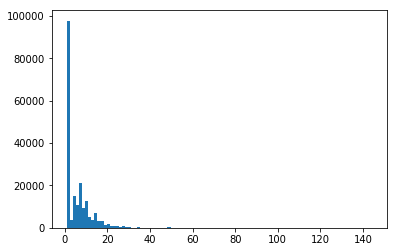

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_counts = pd.value_counts(raw_samples['JobID'].values, sort=False)
plt.hist(sample_counts.values, bins = 100)
plt.show()

# Sample Generation

# Convert Pandas dataframe to LSTM 3D tensor

In [397]:
thresholdd = 20

sum(sample_counts.values>=thresholdd)

7675

In [398]:
### Decision: Number of timesteps per sample = 3
# Shape of 3D matrix should be (#samples)x(3)x(132)

sum(sample_counts.values<thresholdd)

193047

In [399]:
# Delete rows of JobIDs with  fewer than 3 timestamps

dff = raw_samples['JobID'].value_counts()
print(dff.sample(3))

34090756     1
32224060    11
32295992     5
Name: JobID, dtype: int64


In [400]:
dff = dff[dff<thresholdd]


dff = dff.reset_index()
dff = dff.rename(index=str, columns={"JobID": "count", "index": "JobID"})

print(dff.sample(5))
print(dff.head())

remove_list = dff['JobID'].tolist()
remove_list[:5]

           JobID  count
75940   32222263      6
61705   32202809      7
183446  34332520      1
154175  32322362      1
6616    32198659     16
      JobID  count
0  36483182     19
1  23252849     19
2  36483748     19
3  32340886     19
4  36170229     19


[36483182, 23252849, 36483748, 32340886, 36170229]

In [401]:
cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((203349, 316), (1165551, 316))

In [467]:
# Number of unique JobIDs in cleaned
totalleftjobslist = cleaned.JobID.unique().tolist()

totalleftjobs = len(cleaned.JobID.unique().tolist())

In [471]:
import random

indices = random.sample(range(len(totalleftjobslist)), int(totalleftjobs * .30))
takeoutlist = [totalleftjobslist[i] for i in sorted(indices)]

len(takeoutlist), totalleftjobs 

(2302, 7675)

In [472]:
print(len(remove_list))
remove_list = remove_list + takeoutlist
print(len(remove_list))

193047
195349


# Train on cleaned, Test on takeoutdf

In [473]:
cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((142182, 316), (1165551, 316))

In [474]:
takeoutdf = raw_samples[raw_samples['JobID'].isin(takeoutlist)]
takeoutdf.shape, raw_samples.shape

((61167, 316), (1165551, 316))

In [475]:
######################

In [476]:
# Count values in cleaned

cleaned_counts = pd.value_counts(cleaned['JobID'].values, sort=False)
sum(cleaned_counts.values<thresholdd), sum(cleaned_counts.values>=thresholdd)

(0, 5373)

In [477]:
len((sample_counts.values))

200722

In [478]:
train_feat = cleaned.columns.tolist()
print(len(train_feat)) #125
cleaned.Status_Failed.value_counts()

316


1    85478
0    56704
Name: Status_Failed, dtype: int64

In [479]:
train_feat = cleaned.columns.tolist()
print(len(train_feat)) #125

train_feat.remove('HeartBeatTime')
train_feat.remove('JobID')
train_feat.remove('Status_Failed')

len(train_feat) #122

316


313

In [480]:
# Training Features

In [ ]:
train_feat

In [482]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [540]:
cleaned.shape

(142182, 316)

In [541]:
cleaned.to_pickle('timestep20_acc98_cleaned_df.pickle')

In [484]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples(df_input, k, input_cols):
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input[input_cols].apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

In [485]:
# Testing of samples function
we = pd.DataFrame([1,2,3,4,5,6,7,8,9], columns=['A'])
we['B']=[10,20,30,40,50,60,70,80,90]
we['C']=[100,200,300,400,500,600,700,800,900]
we

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500
5,6,60,600
6,7,70,700
7,8,80,800
8,9,90,900


In [486]:
thresholdd

20

In [487]:
%%time
# Decision : Orderting of timesteps from top to bottom is t, t-1, t-2
X = samples(cleaned, k=thresholdd, input_cols = train_feat)

CPU times: user 41.6 s, sys: 8.36 s, total: 50 s
Wall time: 50.4 s


In [488]:
X.shape

(142163, 20, 313)

In [489]:
%%time
# Decision : Orderting of timesteps from top to bottom is t, t-1, t-2
Y = samples(cleaned, k=thresholdd, input_cols = label_col)

CPU times: user 8.66 s, sys: 99.9 ms, total: 8.76 s
Wall time: 8.76 s


In [490]:
Y.shape

(142163, 20, 1)

In [491]:
YY = np.array([x[0][0] for x in Y]).reshape(len(Y),1)
YY.shape

(142163, 1)

In [492]:
# Unison shuffle

def unison_shuffled_copies(a, b):
    import numpy as np
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [493]:
%%time
X_final, Y_final = unison_shuffled_copies(X,YY)

CPU times: user 1.06 s, sys: 6.61 s, total: 7.66 s
Wall time: 7.69 s


In [494]:
X_final.shape, Y_final.shape

((142163, 20, 313), (142163, 1))

In [495]:
sum(Y_final[:10000])

array([6009])

In [496]:
del X
del Y
del YY

# Start: Build test set from 'takeoutdf'

In [507]:
takeoutdf.shape

(61167, 316)

In [542]:
takeoutdf.to_pickle('timestep20_acc98_takeoutdf_df.pickle')

In [508]:
train_feat = takeoutdf.columns.tolist()
print(len(train_feat)) #125
takeoutdf.Status_Failed.value_counts()

316


1    36028
0    25139
Name: Status_Failed, dtype: int64

In [509]:
train_feat = takeoutdf.columns.tolist()
print(len(train_feat)) #125

train_feat.remove('HeartBeatTime')
train_feat.remove('JobID')
train_feat.remove('Status_Failed')

len(train_feat) #122

316


313

In [510]:
# Training Features

In [ ]:
train_feat

In [513]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [514]:
takeoutdf.shape

(61167, 316)

In [515]:
%%time
# Decision : Orderting of timesteps from top to bottom is t, t-1, t-2
X_test = samples(takeoutdf, k=thresholdd, input_cols = train_feat)

CPU times: user 17.9 s, sys: 2.71 s, total: 20.6 s
Wall time: 21.1 s


In [516]:
X_test.shape

(61148, 20, 313)

In [517]:
%%time
# Decision : Orderting of timesteps from top to bottom is t, t-1, t-2
Y_t = samples(takeoutdf, k=thresholdd, input_cols = label_col)

CPU times: user 4.04 s, sys: 84.9 ms, total: 4.12 s
Wall time: 4.14 s


In [518]:
Y_t.shape

(61148, 20, 1)

In [519]:
Y_test = np.array([x[0][0] for x in Y_t]).reshape(len(Y_t),1)
Y_test.shape

(61148, 1)

In [520]:
X_test.shape, Y_test.shape

((61148, 20, 313), (61148, 1))

In [525]:
X_final.shape, Y_final.shape

((142163, 20, 313), (142163, 1))

In [521]:
sum(Y_test[:10000])

array([7012])

In [523]:
del Y_t

# End test set from 'takeoutdf'

## Build Model

In [497]:
input_length = X_final.shape[1]

input_dim = X_final.shape[2]

# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(Y_final[0])

In [424]:
# NO NEED TO SPLIT, SINCE TESTING WILL OCCUR ON leftoutdf taken out earlier

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_final,Y_final,test_size=0.33,random_state=24)

In [425]:
#X_train.shape,y_train.shape, X_test.shape,  y_test.shape

((136231, 20, 313), (136231, 1), (67099, 20, 313), (67099, 1))

In [499]:
sum([x[0] for x in Y_final])/ len(Y_final)

0.6011339096670723

In [501]:
Y_final[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [502]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
input_dim, input_length, output_dim

(313, 20, 1)

In [503]:
def create_model(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model...')
    model = Sequential()
    model.add(LSTM(20, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(20))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

In [504]:
model = create_model()

Creating model...
Compiling...


In [505]:
%%time
print ('Fitting model...')
history = model.fit(X_final, Y_final, batch_size=64, epochs=3, validation_split = 0.1, verbose = 1)

Fitting model...
Train on 127946 samples, validate on 14217 samples
Epoch 1/3
127946/127946 [==============================] - 107s 837us/step - loss: 0.4356 - binary_accuracy: 0.7465 - val_loss: 0.0537 - val_binary_accuracy: 0.9858
Epoch 2/3
127946/127946 [==============================] - 110s 858us/step - loss: 0.0439 - binary_accuracy: 0.9871 - val_loss: 0.0232 - val_binary_accuracy: 0.9940
Epoch 3/3
127946/127946 [==============================] - 109s 854us/step - loss: 0.0340 - binary_accuracy: 0.9903 - val_loss: 0.0211 - val_binary_accuracy: 0.9947
CPU times: user 23min 29s, sys: 6min 31s, total: 30min 1s
Wall time: 5min 27s


In [526]:
loss, accuracy = model.evaluate(X_test, Y_test)

61148/61148 [==============================] - 24s 397us/step


# Accuracy

In [527]:
loss, accuracy

(0.040017183334368274, 0.9875711388761693)

In [528]:
# when taking 20 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# (0.040017183334368274, 0.9875711388761693) on X_test, Y_test

In [529]:
y_pred = model.predict(X_test)

In [544]:
# model.save('model_keras_lstm_timestep20_acc98')

In [538]:
y_pred[:4]

array([[0.99969053],
       [0.9996904 ],
       [0.9996904 ],
       [0.9996904 ]], dtype=float32)

# Binary classification accuracy

In [539]:
np.mean(np.equal(y_true, y_predicted))

0.9875711388761693

In [531]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

# Confusion matrix

In [532]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,24831,308,25139
1,452,35557,36009
All,25283,35865,61148


In [537]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

[]

In [458]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted])

40110.0

# Checkpoint: Valid code above this line

### Appendix below this line:

In [ ]:
#### Save X to disk



#### Create Labels



##### Make X_train, X_test




##### Create LSTM



##### Train LSTM


##### Test LSTM

In [ ]:
def vector_generator():
    # for a given JOBID, return a list of vectors
    # each vector is a feature vector (observation) at a timestamp t
    # length of feature vector = n
    
    new_dict = {}
    # jobID --> { timestamp -> [features], timestamp -> [features], timestamp -> [features], ... }
    
    ####################################
    # Single Table Features
    ####################################
    
    #### Iterate throught each table and pick the feature of interest from each table
    
    #### Continuous
    
    #### Categorical
    
    
    ####################################
    # Multi-table features (JOINs)
    ####################################
    
    #### Continuous
    
    #### Categorical
    
    
    return None

In [ ]:
def vec_2_samples():
    # take the list of vectors for a given job, and reshape it to 3D np array
    # each sample could be one-time step or >1 time-step observation
    # 3D array : s x t x n
    # s = # of samples
    # t = # of timesteps in each sample
    # n = # length of each feature vector
    return None

In [ ]:
def sample_stacker():
    # takes samples of a set of jobs
    # and stacks these samples on top of each other
    # np.append(A, B, axis =0)
    # returned 3D array is a set of samples that can be fed to an LSTM
    return None